In [120]:
library(ggplot2)
library(dplyr)

source(file.path("R", "class.R"))
# source(file.path("R", "modify_parameters.R"))
# source(file.path("R", "sensi_utils_salib.R"))
source(file.path("R", "sensi_utils_summarize.R"))
source(file.path("R", "utils_run_apsimx.R"))

proj <- RApsimxSensitivity("tmp_sensi3")

✔ Loading tmp_sensi3...

✔ Folder: /home/luanabeckerdaluz/git/luanabeckerdaluz/rapsimx/tmp_sensi3



✔ ApsimX command = /usr/local/bin/Models

✔ File problem.rds is available!

✔ File samples.csv is available!

! File summarized.csv does not exist!

! File salib.csv does not exist!

ℹ Summary:

ℹ   Folder = /home/luanabeckerdaluz/git/luanabeckerdaluz/rapsimx/tmp_sensi3

ℹ   Number of dbs: 2

ℹ   Number of apsimxs: 10



In [126]:
proj$import_or_overwrite_problem("problem.R")
proj$problem

✔ File problem.R is available!



✔ problem was updated!



$num_vars
[1] 17

$names
 [1] "phen_VegTherTimeResp_X3"   "phen_RepTherTimeResp_X3"  
 [3] "phen_VegPhoMod_X1"         "phen_RepPhoMod_X1"        
 [5] "phen_VegetativeTarget"     "phen_EarlyFloweringTarget"
 [7] "phen_EarlyPodDevTarget"    "phen_FractGrainFill"      
 [9] "phen_MidGrainFill"         "phen_EntGrainFill"        
[11] "phen_Maturing"             "phen_Ripening"            
[13] "leaf_RUE"                  "leaf_AreaLargLeaf"        
[15] "leaf_Phyllochron"          "leaf_ExtinctionCoef_Y1"   
[17] "grain_HarvIndex"          

$bounds
$bounds[[1]]
[1] 21 39

$bounds[[2]]
[1] 21 39

$bounds[[3]]
[1] 10.5 14.5

$bounds[[4]]
[1] 10.5 14.5

$bounds[[5]]
[1] 200 600

$bounds[[6]]
[1] 100 300

$bounds[[7]]
[1]  70 210

$bounds[[8]]
[1] 0.035 0.065

$bounds[[9]]
[1] 0.35 0.65

$bounds[[10]]
[1] 250 750

$bounds[[11]]
[1] 35 65

$bounds[[12]]
[1] 35 65

$bounds[[13]]
[1] 0.8 1.6

$bounds[[14]]
[1] 0.004 0.008

$bounds[[15]]
[1] 35 65

$bounds[[16]]
[1] 0.4 0.8

$bounds[[17]]
[1] 0.35 0.65

In [122]:
proj$generate_samples(method = "LHS", n_samples = 10L)

! Samples file samples.csv already exists! However, it will be overwritten.

✔ File samples.csv saved!



,id,phen_VegTherTimeResp_X3,phen_RepTherTimeResp_X3,phen_VegPhoMod_X1,phen_RepPhoMod_X1,phen_VegetativeTarget,phen_EarlyFloweringTarget,phen_EarlyPodDevTarget,phen_FractGrainFill,phen_MidGrainFill,phen_EntGrainFill,phen_Maturing,phen_Ripening,leaf_RUE,leaf_AreaLargLeaf,leaf_Phyllochron,leaf_ExtinctionCoef_Y1,grain_HarvIndex
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,33.76308,21.06957,12.92585,14.21477,389.4541,250.2836,174.43877,0.05083219,0.5449011,450.4795,54.24265,60.45825,1.1983377,0.006900060,52.38999,0.6246613,0.6480531
2,2,27.42114,31.72201,12.35544,12.83607,455.2944,299.8768,126.59973,0.04875688,0.4481962,511.2059,52.39988,43.99558,1.4986806,0.006700342,39.52693,0.6880646,0.5704967
3,3,38.50553,33.85541,10.65447,13.63580,341.0147,112.8200,152.09459,0.05614101,0.6048168,368.6850,37.81525,51.44380,1.2763923,0.007840202,62.69034,0.7672312,0.4064908
4,4,22.84988,28.18702,14.12968,12.11416,259.4750,158.7402,85.23136,0.03750923,0.3664725,291.4420,46.86784,49.97271,0.8075441,0.005661438,49.99827,0.7369762,0.3712612
5,5,21.73415,23.78310,13.30596,11.82342,593.8071,171.8103,167.69126,0.03977518,0.5880865,325.6817,43.61833,40.83245,1.5449157,0.005408252,58.68791,0.4093759,0.5044527
6,6,36.05039,24.75495,12.50210,14.05671,302.4509,209.7737,186.53984,0.06119690,0.3812973,437.8635,62.06587,45.49550,0.9541676,0.007590951,36.74895,0.6516883,0.4596221


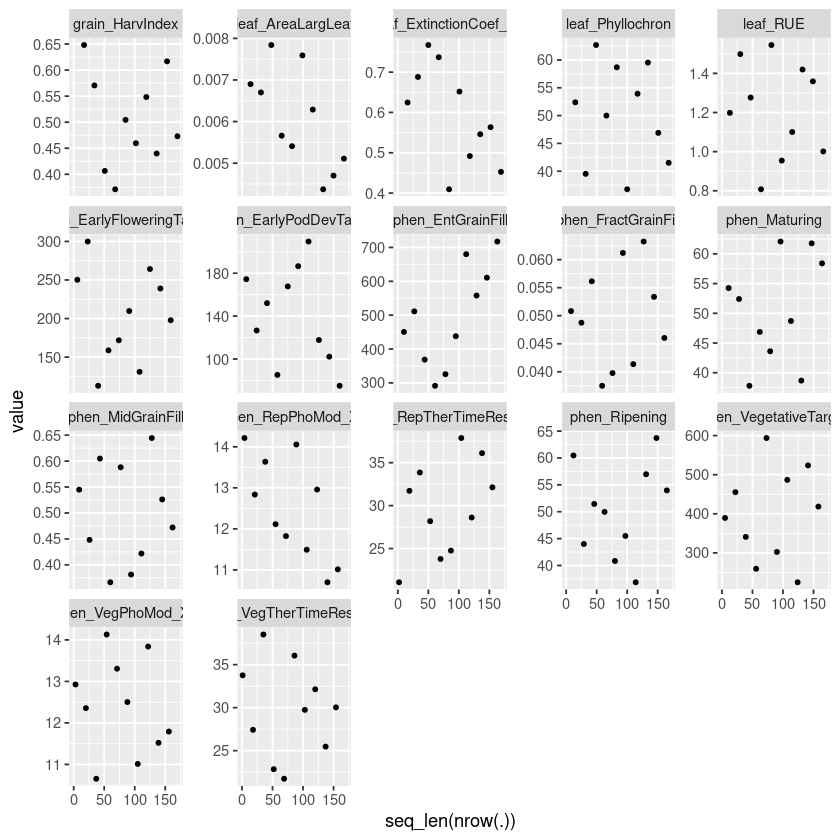

In [125]:
head(proj$samples_df)
proj$samples_df.plot()

In [124]:
proj$info()

✔ Folder: /home/luanabeckerdaluz/git/luanabeckerdaluz/rapsimx/tmp_sensi3

✔ ApsimX command = /usr/local/bin/Models

✔ File problem.rds is available!

✔ File samples.csv is available!

! File summarized.csv does not exist!

! File salib.csv does not exist!

ℹ Summary:

ℹ   Folder = /home/luanabeckerdaluz/git/luanabeckerdaluz/rapsimx/tmp_sensi3

ℹ   Number of dbs: 2

ℹ   Number of apsimxs: 10



In [127]:
proj$generate_apsimxs(
  sensit_base_sim_filepath = "./base_simulations/Soy-BR-clean.apsimx",
  runs_only_some_n = 10L,
  dry_run = FALSE
)

✔ Generating 10 samples...



  |======================================================================| 100%


✔ Folder: /home/luanabeckerdaluz/git/luanabeckerdaluz/rapsimx/tmp_sensi3

✔ ApsimX command = /usr/local/bin/Models

✔ File problem.rds is available!

✔ File samples.csv is available!

! File summarized.csv does not exist!

! File salib.csv does not exist!

ℹ Summary:

ℹ   Folder = /home/luanabeckerdaluz/git/luanabeckerdaluz/rapsimx/tmp_sensi3

ℹ   Number of dbs: 2

ℹ   Number of apsimxs: 10



In [78]:
# proj$run(
#   runs_only_some_n = 2L,
#   simulations_names = NULL,
#   ids_to_run = NULL,
#   dry_run = FALSE
# )

In [129]:
proj$summarize(
  ids_to_summarize = NULL,
  number_of_fields_to_check = NULL,
  runs_only_some_n = NULL,
  dry_run = FALSE
)

✔ summarized.csv file doesn't exist. Generating...



  |                                                                      |   0%

ERROR: Error in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]): there is no package called ‘bit’
